#  This notebook is used to explore some of the models and data in Torch.

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from collections import Counter
import torchvision.models as models
from torchsummary import summary

# Load in the EMNIST data

This is the dataset that will be used by this project.

Following blocks of code loads in the dataset and visualises it.

In [3]:
dataset_train = datasets.EMNIST(root='./data', split='letters', train=True, download=True, transform=transforms.ToTensor())
dataset_test = datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 562M/562M [00:32<00:00, 17.3MB/s]


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


Get the dimensions, distributions for the dataset

In [ ]:
# Check the dimensions of the images as well as the number of classes and samples.
image_train, label_train = dataset_train[0]
print("Dimensions of images:", image_train.shape)

num_classes = len(dataset_train.classes)
print("# Classes:", num_classes-1)

num_train_samples = len(dataset_train)
print("# Training Samples:", num_train_samples)

num_test_samples = len(dataset_train)
print("# Testing Samples:", num_test_samples)

class_counts = Counter(dataset_train.targets.tolist())
for class_label, count in sorted(class_counts.items()):
    print(f"Class {class_label}: {count} samples")

Dimensions of images: torch.Size([1, 28, 28])
# Classes: 26
# Training Samples: 124800
# Testing Samples: 124800
Class 1: 4800 samples
Class 2: 4800 samples
Class 3: 4800 samples
Class 4: 4800 samples
Class 5: 4800 samples
Class 6: 4800 samples
Class 7: 4800 samples
Class 8: 4800 samples
Class 9: 4800 samples
Class 10: 4800 samples
Class 11: 4800 samples
Class 12: 4800 samples
Class 13: 4800 samples
Class 14: 4800 samples
Class 15: 4800 samples
Class 16: 4800 samples
Class 17: 4800 samples
Class 18: 4800 samples
Class 19: 4800 samples
Class 20: 4800 samples
Class 21: 4800 samples
Class 22: 4800 samples
Class 23: 4800 samples
Class 24: 4800 samples
Class 25: 4800 samples
Class 26: 4800 samples


Dataset seems balanced so no need to make changes to the distribution.

Images are [1,28,28] so no colour.

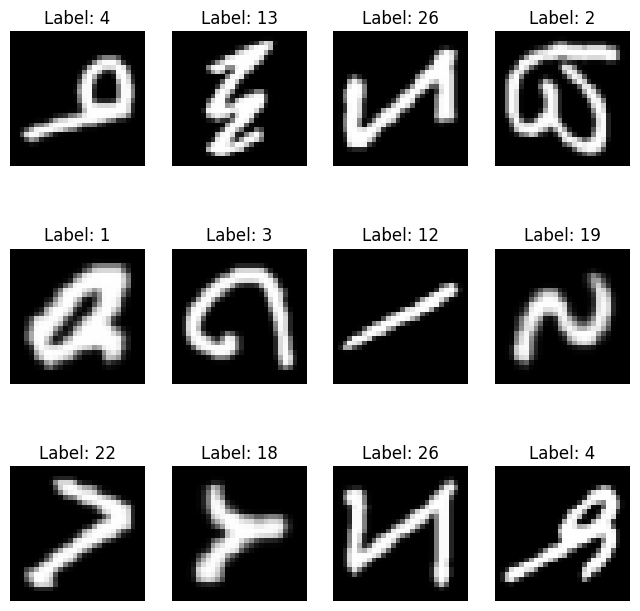

In [ ]:
# Visualise

figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset_train), size=(1,)).item()
    img, label = dataset_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Label: {label}")
plt.show()


Visualising the image shows it's actually quite difficult to identify which image is what.

## Load in the two models -

This project will compare EfficientNetV2-S with EfficientNet-B4.

This is done as they have a fairly similar number of parameters and so it would be interesting to see if there are any differences in performance/efficiency between the two.

Note that both models are easily downloadable through Torch.

EfficientNet-B4:
 https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b4.html#torchvision.models.efficientnet_b4

EfficientNetV2-S
https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_v2_s.html#torchvision.models.efficientnet_v2_s

In [ ]:
efficientnetv2_s = models.efficientnet_v2_s()
efficientnet_b4 = models.efficientnet_b4()

In [ ]:
summary(efficientnetv2_s,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 112, 112]             648
       BatchNorm2d-2         [-1, 24, 112, 112]              48
              SiLU-3         [-1, 24, 112, 112]               0
            Conv2d-4         [-1, 24, 112, 112]           5,184
       BatchNorm2d-5         [-1, 24, 112, 112]              48
              SiLU-6         [-1, 24, 112, 112]               0
   StochasticDepth-7         [-1, 24, 112, 112]               0
       FusedMBConv-8         [-1, 24, 112, 112]               0
            Conv2d-9         [-1, 24, 112, 112]           5,184
      BatchNorm2d-10         [-1, 24, 112, 112]              48
             SiLU-11         [-1, 24, 112, 112]               0
  StochasticDepth-12         [-1, 24, 112, 112]               0
      FusedMBConv-13         [-1, 24, 112, 112]               0
           Conv2d-14           [-1, 96,

In [ ]:
summary(efficientnet_b4,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 48, 112, 112]           1,296
       BatchNorm2d-2         [-1, 48, 112, 112]              96
              SiLU-3         [-1, 48, 112, 112]               0
            Conv2d-4         [-1, 48, 112, 112]             432
       BatchNorm2d-5         [-1, 48, 112, 112]              96
              SiLU-6         [-1, 48, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 48, 1, 1]               0
            Conv2d-8             [-1, 12, 1, 1]             588
              SiLU-9             [-1, 12, 1, 1]               0
           Conv2d-10             [-1, 48, 1, 1]             624
          Sigmoid-11             [-1, 48, 1, 1]               0
SqueezeExcitation-12         [-1, 48, 112, 112]               0
           Conv2d-13         [-1, 24, 112, 112]           1,152
      BatchNorm2d-14         [-1, 24, 1

EfficientNetV2-S has about 22m parameters and EfficientNet-B4 has about 19m parameters.

This lines up with the paper.

Note that since EMNIST has 28x28 images, these need to be reshaped before they can be passed through to either of these models.

This concludes the exploration. I will now train these networks on the EMNIST data and evaluate.